# Summary: Everything is Here!
This file contains all the results and tests performed on generated synthetic data.
- Download data from UK Data Services and place it in Data Directory and "$run$ $all$" this summay file to run the whole project.

In [ ]:
# Executing data wrangling file...
!python data-wrangling.py

In [ ]:
# Executing modeling file...
!python modeling.py

In [2]:
# Importing required packages...
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns
from table_evaluator import TableEvaluator
from sdv.evaluation import evaluate

In [3]:
# Allowing to display all the columns.
pd.set_option('display.max_columns', None)

In [3]:
# Loading required files...
real_spss_df = pd.read_csv('../data/spss_merged.csv')
real_ce_df = pd.read_csv('../data/ce_merged.csv')
gen_spss_sep = pd.read_csv('../data/gen_spss_sep.csv')
gen_spss = pd.read_csv('../data/gen_spss.csv')
gen_ce_sep = pd.read_csv('../data/gen_ce_sep.csv')
gen_ce = pd.read_csv('../data/gen_ce.csv')

In [5]:
# Loading required models...
real_spss = pickle.load(open("../models/real_spss.pkl", 'rb'))
real_ce = pickle.load(open("../models/real_ce.pkl", 'rb'))
gen_sep_spss = pickle.load(open("../models/gen_sep_spss.pkl", 'rb'))
gen_spss_model = pickle.load(open("../models/gen_spss_model.pkl", 'rb'))
gen_sep_ce_model = pickle.load(open("../models/gen_sep_ce_model.pkl", 'rb'))
gen_ce_model = pickle.load(open("../models/gen_ce_model.pkl", 'rb'))

In [6]:
real_spss_df.head()

,DMSex,WorkSta,DVAge,Income,Sector,NumChild,NumAdult,DMFlag,dmonth,ddayw,WhereStart,WhereEnd,RushedD,KindOfDay,dia_wt_a,Trip,tid,Device,WhereWhen,whatdoing,eptime
0,2.0,2.0,48.0,3000.0,2.0,1.0,3.0,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.0,1.0,0.0,11.0,110.0,110.0
1,2.0,2.0,48.0,3000.0,2.0,1.0,3.0,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.0,12.0,0.0,11.0,8219.0,10.0
2,2.0,2.0,48.0,3000.0,2.0,1.0,3.0,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.0,13.0,0.0,11.0,310.0,10.0
3,2.0,2.0,48.0,3000.0,2.0,1.0,3.0,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.0,14.0,0.0,11.0,3210.0,10.0
4,2.0,2.0,48.0,3000.0,2.0,1.0,3.0,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.0,15.0,1.0,11.0,3110.0,10.0


In [7]:
gen_spss.head()

,DMSex,WorkSta,DVAge,Income,Sector,NumChild,NumAdult,DMFlag,dmonth,ddayw,WhereStart,WhereEnd,RushedD,KindOfDay,dia_wt_a,Trip,tid,Device,WhereWhen,whatdoing,eptime
0,2.0,10.0,51.0,-9.0,2.0,0.0,4.0,1.0,5.0,1.0,2.0,2.0,2.0,7.0,1.606123,3.0,33.0,-2.0,36.0,67.0,10.0
1,2.0,4.0,26.0,6858.0,0.0,1.0,3.0,2.0,8.0,2.0,1.0,1.0,2.0,3.0,1.507157,3.0,64.0,1.0,0.0,1134.0,100.0
2,2.0,-1.0,24.0,42418.0,1.0,1.0,1.0,2.0,9.0,1.0,2.0,-1.0,2.0,5.0,1.176737,0.0,32.0,1.0,19.0,486.0,10.0
3,2.0,-1.0,51.0,-9.0,1.0,1.0,1.0,2.0,4.0,1.0,-1.0,-2.0,2.0,3.0,2.096352,-0.0,55.0,-3.0,23.0,3387.0,30.0
4,2.0,0.0,40.0,11719.0,0.0,1.0,2.0,2.0,8.0,2.0,-0.0,2.0,-2.0,1.0,0.868506,3.0,44.0,1.0,18.0,6016.0,130.0


In [8]:
gen_spss_sep.head()

,DMSex,WorkSta,DVAge,Income,Sector,NumChild,NumAdult,DMFlag,dmonth,ddayw,WhereStart,WhereEnd,RushedD,KindOfDay,dia_wt_a,Trip,tid,Device,WhereWhen,whatdoing,eptime
0,2.0,2.0,29.0,385.0,-2.0,1.0,2.0,1.0,1.0,2.0,-0.0,0.0,0.0,5.0,1.161157,0.0,106.0,1.0,23.0,4629.0,50.0
1,1.0,1.0,48.0,9441.0,-1.0,1.0,1.0,2.0,5.0,2.0,-2.0,-2.0,-2.0,1.0,0.338608,-3.0,70.0,1.0,24.0,7975.0,30.0
2,2.0,7.0,13.0,37772.0,0.0,2.0,1.0,2.0,7.0,2.0,0.0,0.0,-1.0,1.0,0.130491,3.0,71.0,-3.0,14.0,120.0,50.0
3,2.0,2.0,30.0,-9.0,0.0,2.0,2.0,1.0,8.0,3.0,-2.0,-2.0,-3.0,-2.0,1.333154,-2.0,41.0,0.0,10.0,0.0,90.0
4,2.0,2.0,28.0,11599.0,0.0,3.0,1.0,1.0,12.0,2.0,2.0,2.0,1.0,4.0,0.616119,3.0,61.0,1.0,-9.0,710.0,190.0


In [9]:
real_ce_df.head()

,DVAge,NumChild,NumAdult,dia_wt_a,eptime,DMSex_count,WorkSta_count,Income_count,Sector_count,DMFlag_count,dmonth_count,ddayw_count,WhereStart_count,WhereEnd_count,RushedD_count,KindOfDay_count,Trip_count,tid_count,Device_count,WhereWhen_count,whatdoing_count
0,48,1,3,2.021182,110.0,339140,245628,36312,140226,64345,31891,299788,543584,536135,446963,193731,489350,16531,463457,397040,55365
1,48,1,3,2.021182,10.0,339140,245628,36312,140226,64345,31891,299788,543584,536135,446963,193731,489350,1068,463457,397040,3176
2,48,1,3,2.021182,10.0,339140,245628,36312,140226,64345,31891,299788,543584,536135,446963,193731,489350,2315,463457,397040,52985
3,48,1,3,2.021182,10.0,339140,245628,36312,140226,64345,31891,299788,543584,536135,446963,193731,489350,1892,463457,397040,11621
4,48,1,3,2.021182,10.0,339140,245628,36312,140226,64345,31891,299788,543584,536135,446963,193731,489350,1925,86533,397040,30958


In [10]:
gen_ce_sep.head()

,DVAge,NumChild,NumAdult,DMSex_count,WorkSta_count,Income_count,Sector_count,dia_wt_a,eptime,DMFlag_count,dmonth_count,ddayw_count,WhereStart_count,WhereEnd_count,RushedD_count,KindOfDay_count,Trip_count,tid_count,Device_count,WhereWhen_count,whatdoing_count
0,41,1,1,5551,3072,896,5142,0.546445,90.0,298238,41532,139314,503086,536135,367981,193731,294666,7824,463457,397040,49027
1,33,0,3,5901,2177,138,3931,1.063959,10.0,300403,55118,294372,527459,527528,303227,15310,210639,5211,156148,233989,46936
2,5,0,2,5520,1167,959,5142,1.174317,170.0,156773,53441,220994,417325,270216,270090,72604,489350,4471,354771,86724,1481
3,56,1,3,5590,4248,863,2654,1.403319,10.0,467138,62305,202098,295043,446327,244224,141671,67699,4114,277020,16,25717
4,65,0,5,5520,3383,1264,4462,1.261986,10.0,352240,63033,272464,483478,536135,190880,162617,376356,1105,463457,397040,55145


In [11]:
gen_ce.head()

,DVAge,NumChild,NumAdult,dia_wt_a,eptime,DMSex_count,WorkSta_count,Income_count,Sector_count,DMFlag_count,dmonth_count,ddayw_count,WhereStart_count,WhereEnd_count,RushedD_count,KindOfDay_count,Trip_count,tid_count,Device_count,WhereWhen_count,whatdoing_count
0,66,2,2,1.423749,50.0,295049,97344,11309,170307,419993,47845,268847,543584,402265,446963,163466,489350,6238,463457,397040,39504
1,41,2,2,0.524670,10.0,339140,130819,9,192854,382336,40027,211491,312765,515928,417646,135970,489350,2928,302266,168769,9850
2,32,1,2,1.867317,30.0,248403,121419,49250,233911,130368,58034,299788,504478,387754,206524,33536,410366,6769,319857,241514,56866
3,58,0,2,1.425323,10.0,315359,245628,58803,244350,467138,52050,260788,530918,346350,15184,182274,202167,7723,463457,12774,18800
4,40,1,3,1.063106,10.0,266731,189169,18736,268047,122517,37848,179294,250488,536135,384175,186492,358629,3624,463457,41380,1


In [5]:
# Split data into test and train...
def split_data(df):
    y = df.loc[:,'eptime'].values
    X = df.drop('eptime', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    return X_train, X_test, y_train, y_test

In [13]:
# Setting figure size...
sns.set(rc={"figure.figsize":(20, 8)}) #width=3, #height=4

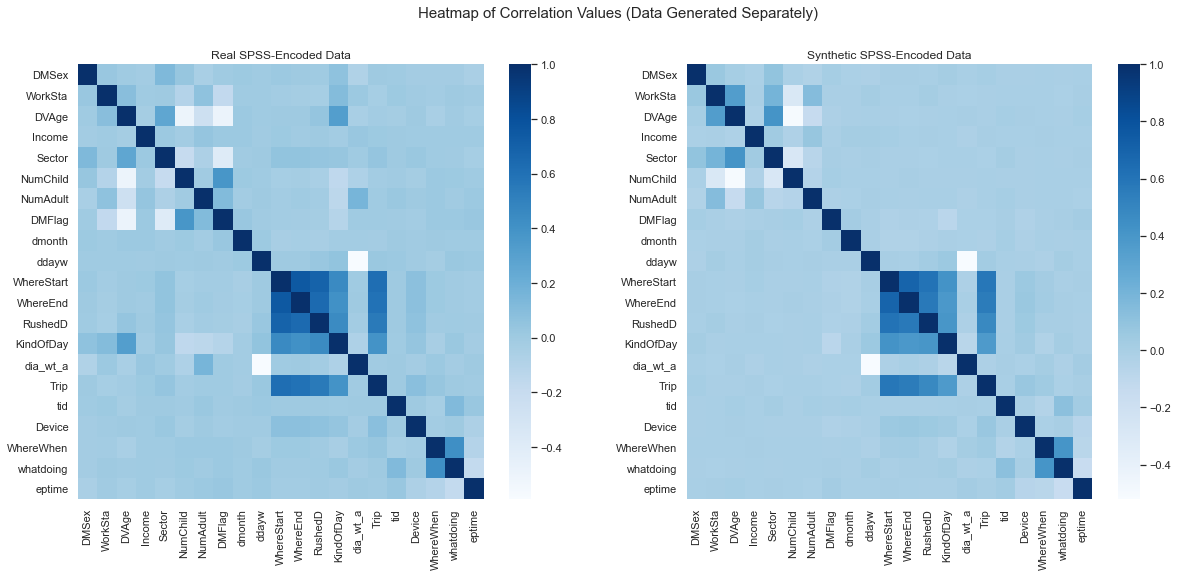

In [14]:
# Heatmap of Correlation Values (Data Generated Separately)
fig, axs = plt.subplots(ncols=2)
fig.suptitle("Heatmap of Correlation Values (Data Generated Separately)", fontsize=15)
axs[0].set_title('Real SPSS-Encoded Data')
axs[1].set_title('Synthetic SPSS-Encoded Data')
sns.heatmap(real_spss_df.corr(), ax=axs[0], cmap="Blues")
sns.heatmap(gen_spss_sep.corr(), ax=axs[1], cmap="Blues")
plt.show()

In [16]:
# Evaluating the synthetic data against the real one...
evaluate(gen_spss_sep, real_spss_df, metrics=['KSTest'], aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.769438,0.769438,0.0,1.0,MAXIMIZE,None


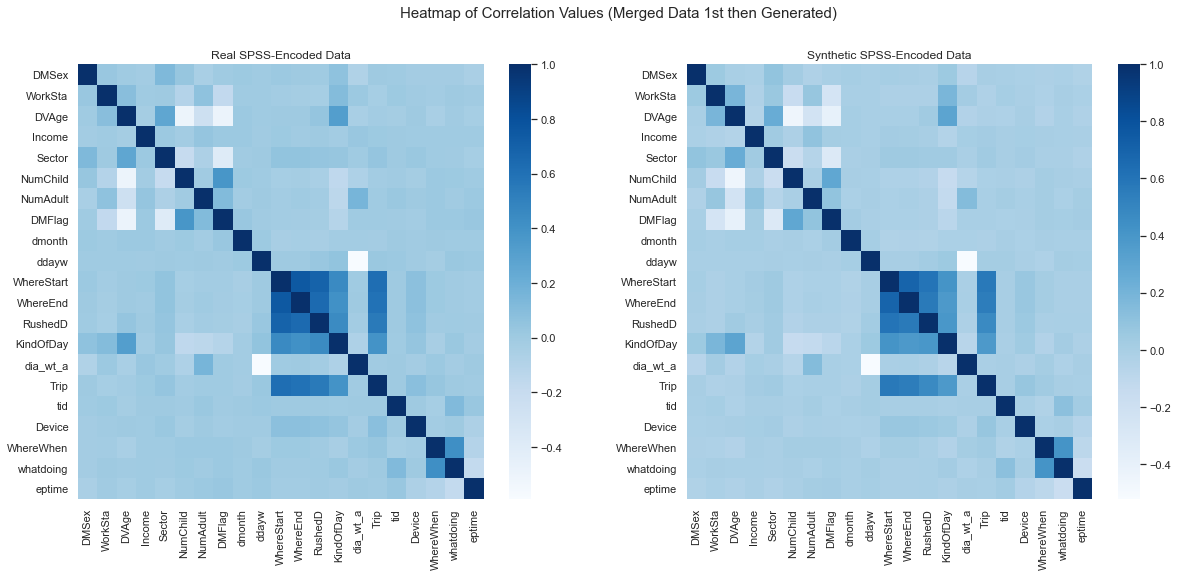

In [17]:
fig, axs = plt.subplots(ncols=2)
fig.suptitle("Heatmap of Correlation Values (Merged Data 1st then Generated)", fontsize=15)
axs[0].set_title('Real SPSS-Encoded Data')
axs[1].set_title('Synthetic SPSS-Encoded Data')
sns.heatmap(real_spss_df.corr(), ax=axs[0], cmap="Blues")
sns.heatmap(gen_spss.corr(), ax=axs[1], cmap="Blues")
plt.show()

In [19]:
evaluate(gen_spss, real_spss_df, metrics=['KSTest'], aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.785183,0.785183,0.0,1.0,MAXIMIZE,None


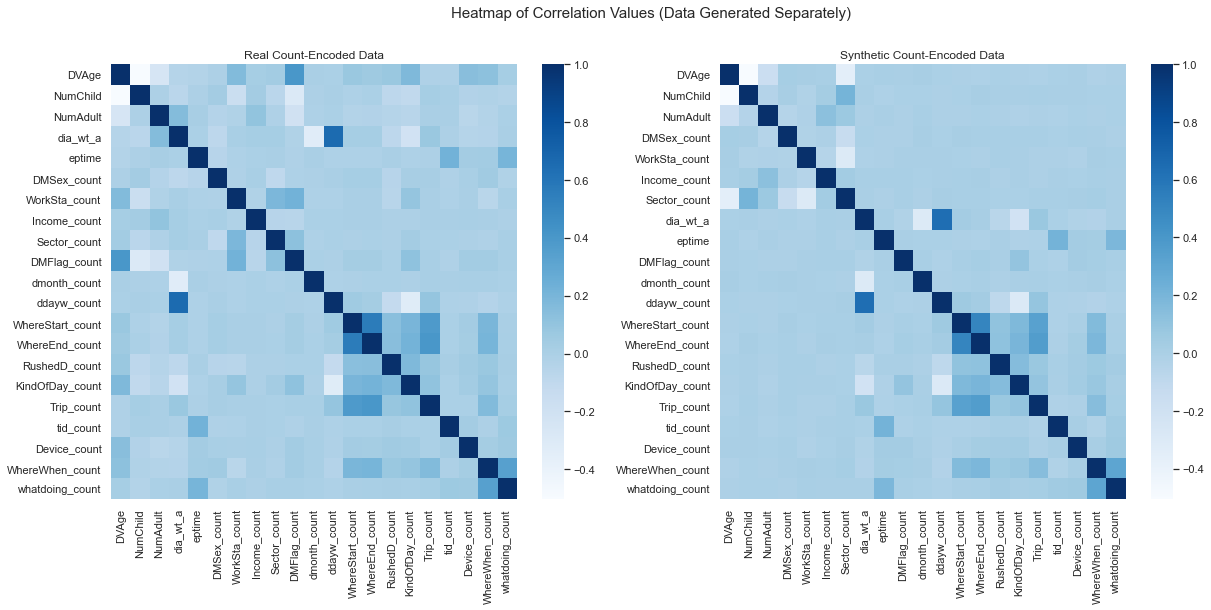

In [20]:
fig, axs = plt.subplots(ncols=2)
fig.suptitle("Heatmap of Correlation Values (Data Generated Separately)", fontsize=15)
axs[0].set_title('Real Count-Encoded Data')
axs[1].set_title('Synthetic Count-Encoded Data')
sns.heatmap(real_ce_df.corr(), ax=axs[0], cmap="Blues")
sns.heatmap(gen_ce_sep.corr(), ax=axs[1], cmap="Blues")
plt.show()

In [22]:
evaluate(gen_ce_sep, real_ce_df, metrics=['KSTest'], aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.550892,0.550892,0.0,1.0,MAXIMIZE,None


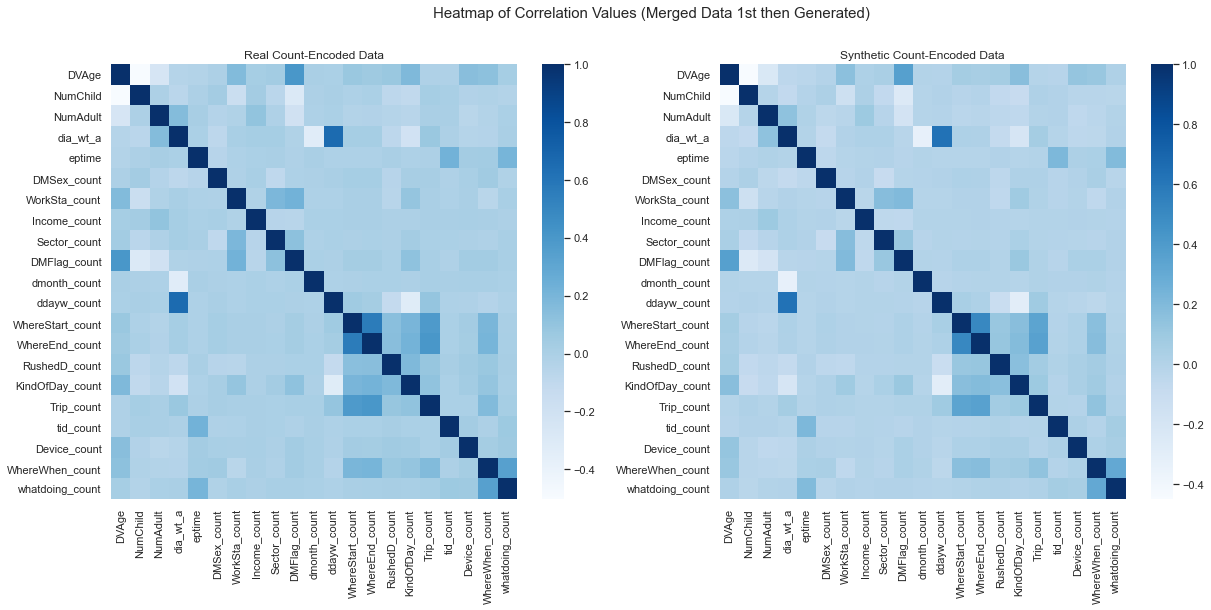

In [23]:
fig, axs = plt.subplots(ncols=2)
fig.suptitle("Heatmap of Correlation Values (Merged Data 1st then Generated)", fontsize=15)
axs[0].set_title('Real Count-Encoded Data')
axs[1].set_title('Synthetic Count-Encoded Data')
sns.heatmap(real_ce_df.corr(), ax=axs[0], cmap="Blues", )
sns.heatmap(gen_ce.corr(), ax=axs[1], cmap="Blues")
plt.show()

In [24]:
evaluate(gen_ce, real_ce_df, metrics=['KSTest'], aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.684083,0.684083,0.0,1.0,MAXIMIZE,None


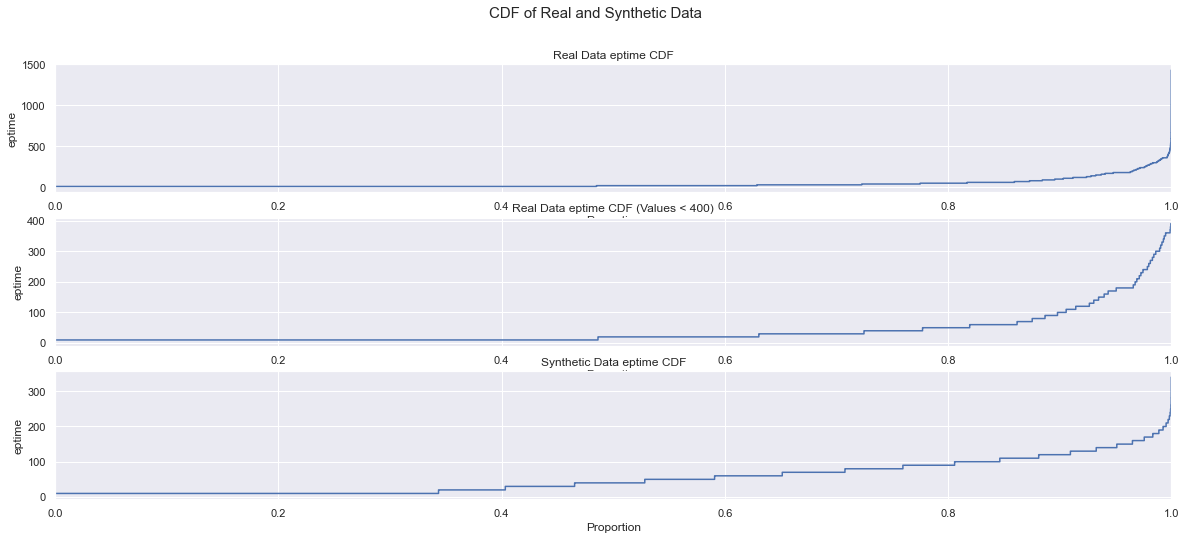

In [25]:
# Cumulative distribution of eptime(time spent)...
fig, axs = plt.subplots(nrows=3)
fig.suptitle("CDF of Real and Synthetic Data", fontsize=15)
axs[0].set_title('Real Data eptime CDF')
axs[1].set_title('Real Data eptime CDF (Values < 400)')
axs[2].set_title('Synthetic Data eptime CDF')
sns.ecdfplot(real_spss_df, ax=axs[0], y="eptime")
sns.ecdfplot(real_spss_df.loc[real_spss_df['eptime'] < 400], ax=axs[1], y="eptime")
sns.ecdfplot(gen_spss, ax=axs[2], y="eptime")
plt.show()

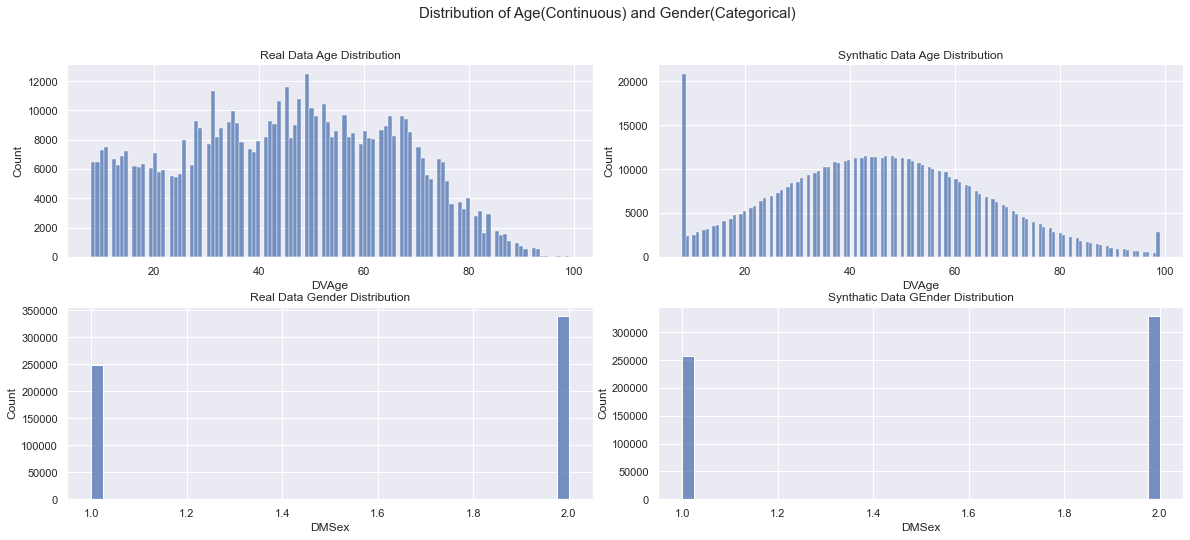

In [26]:
# Probability distribution of Age and Gender...
fig, axs = plt.subplots(nrows = 2, ncols=2)
fig.subplots_adjust(hspace=0.26, wspace=0.125)
fig.suptitle("Distribution of Age(Continuous) and Gender(Categorical)", fontsize=15)
axs[0,0].set_title('Real Data Age Distribution')
axs[0,1].set_title('Synthatic Data Age Distribution')
axs[1,0].set_title('Real Data Gender Distribution')
axs[1,1].set_title('Synthatic Data GEnder Distribution')
sns.histplot(real_spss_df['DVAge'], ax = axs[0,0])
sns.histplot(gen_spss['DVAge'], ax = axs[0,1])
sns.histplot(real_spss_df['DMSex'], ax = axs[1,0])
sns.histplot(gen_spss['DMSex'], ax = axs[1,1])
plt.show()

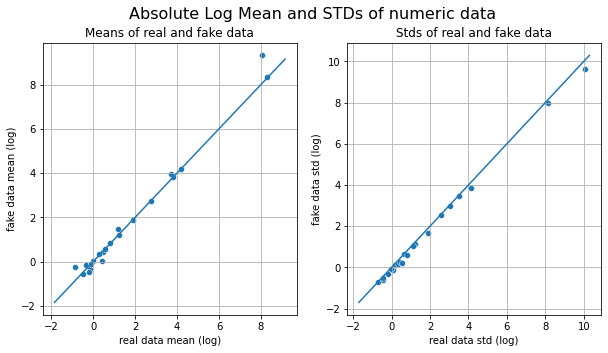

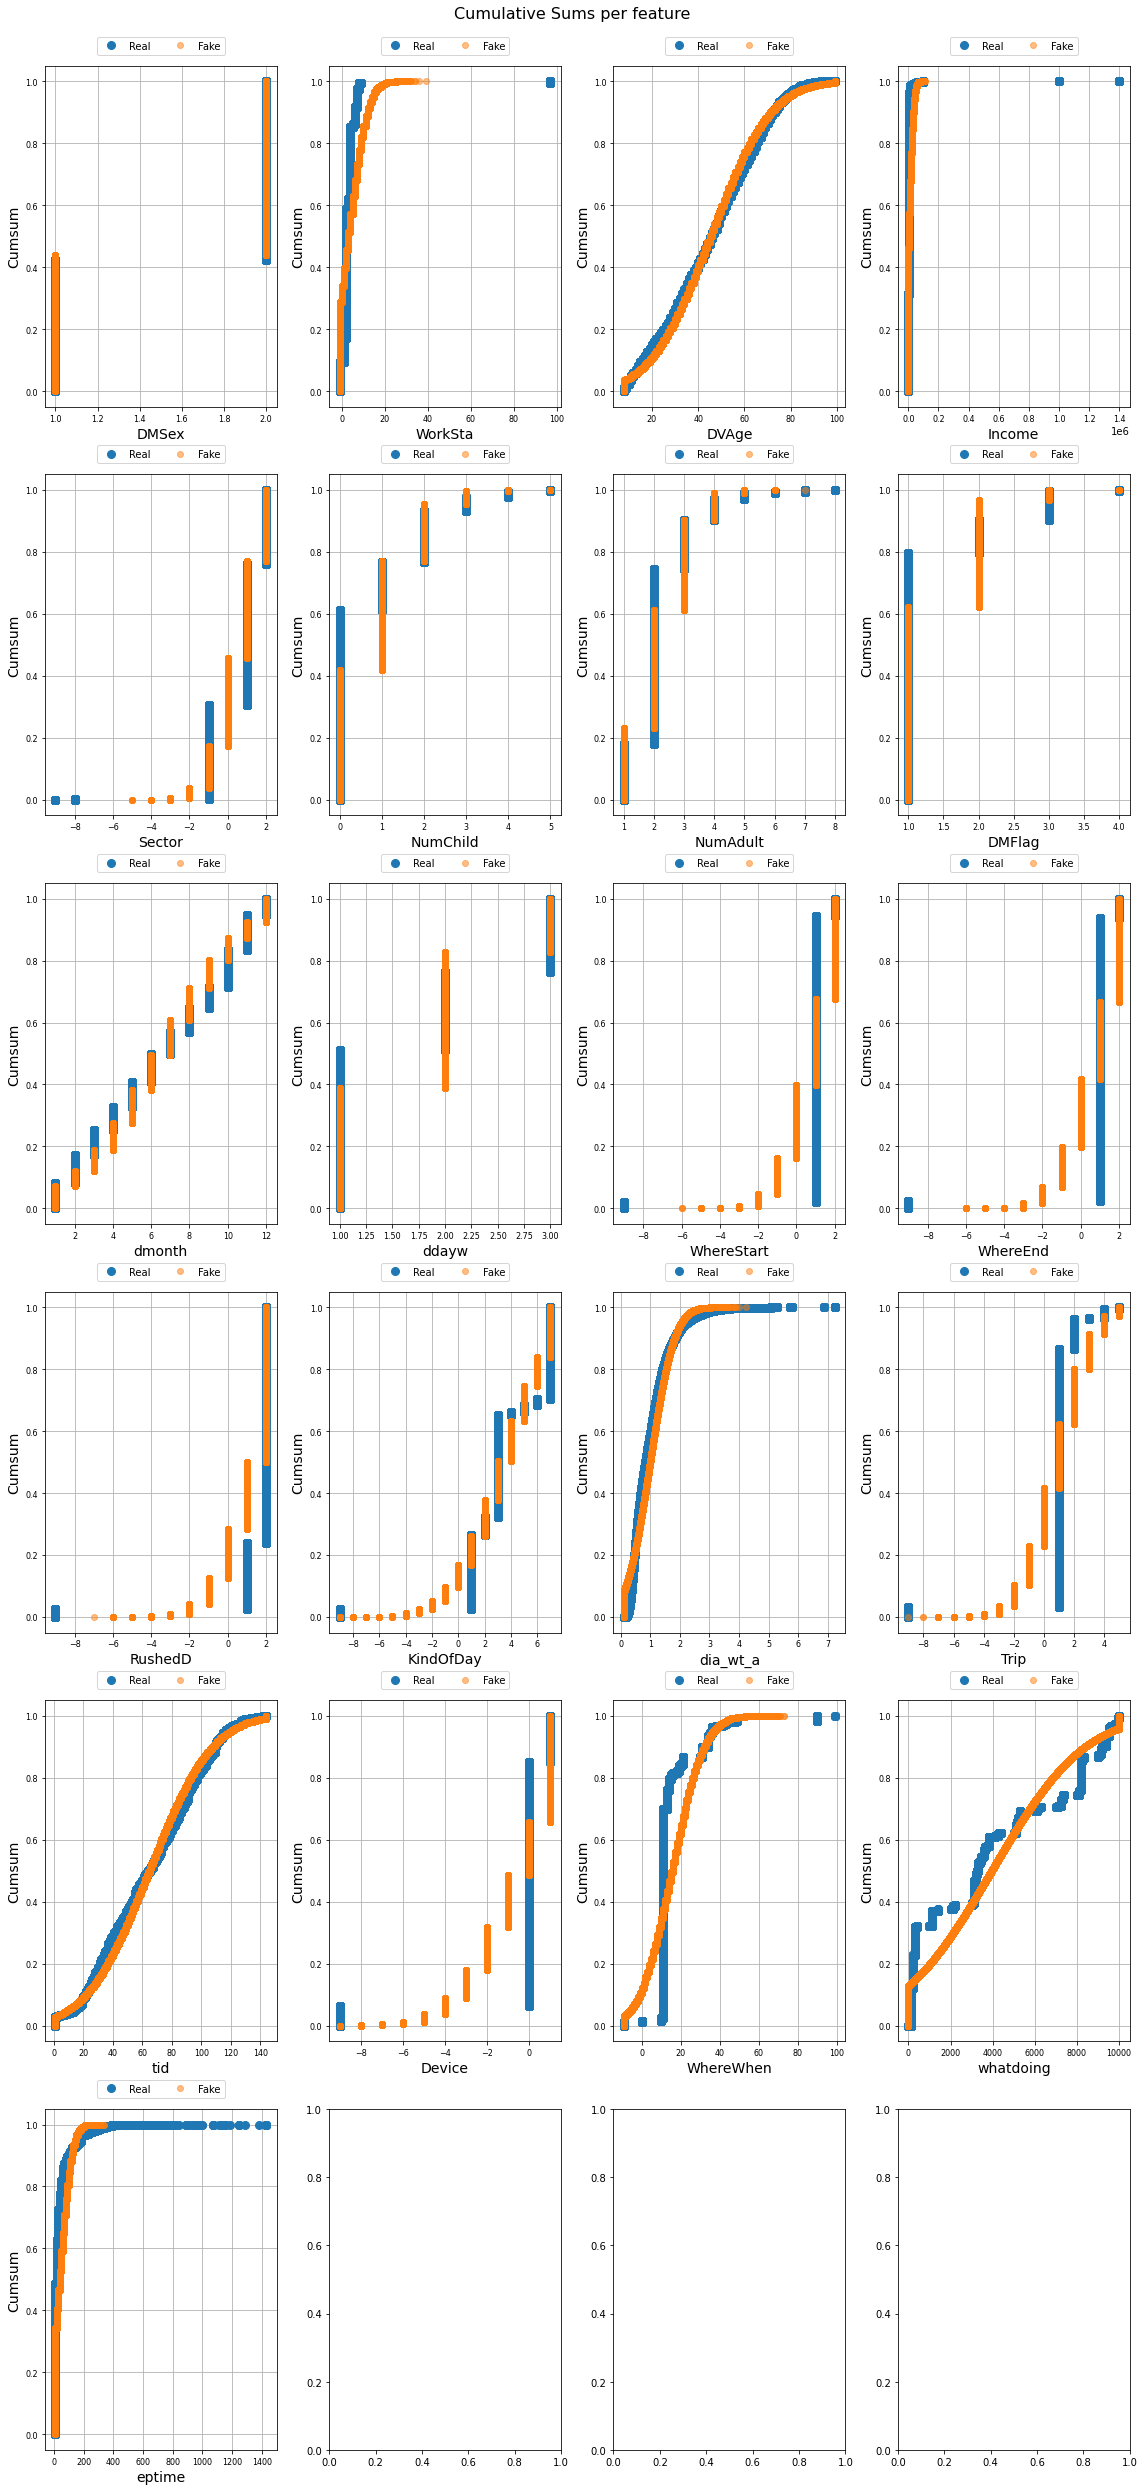

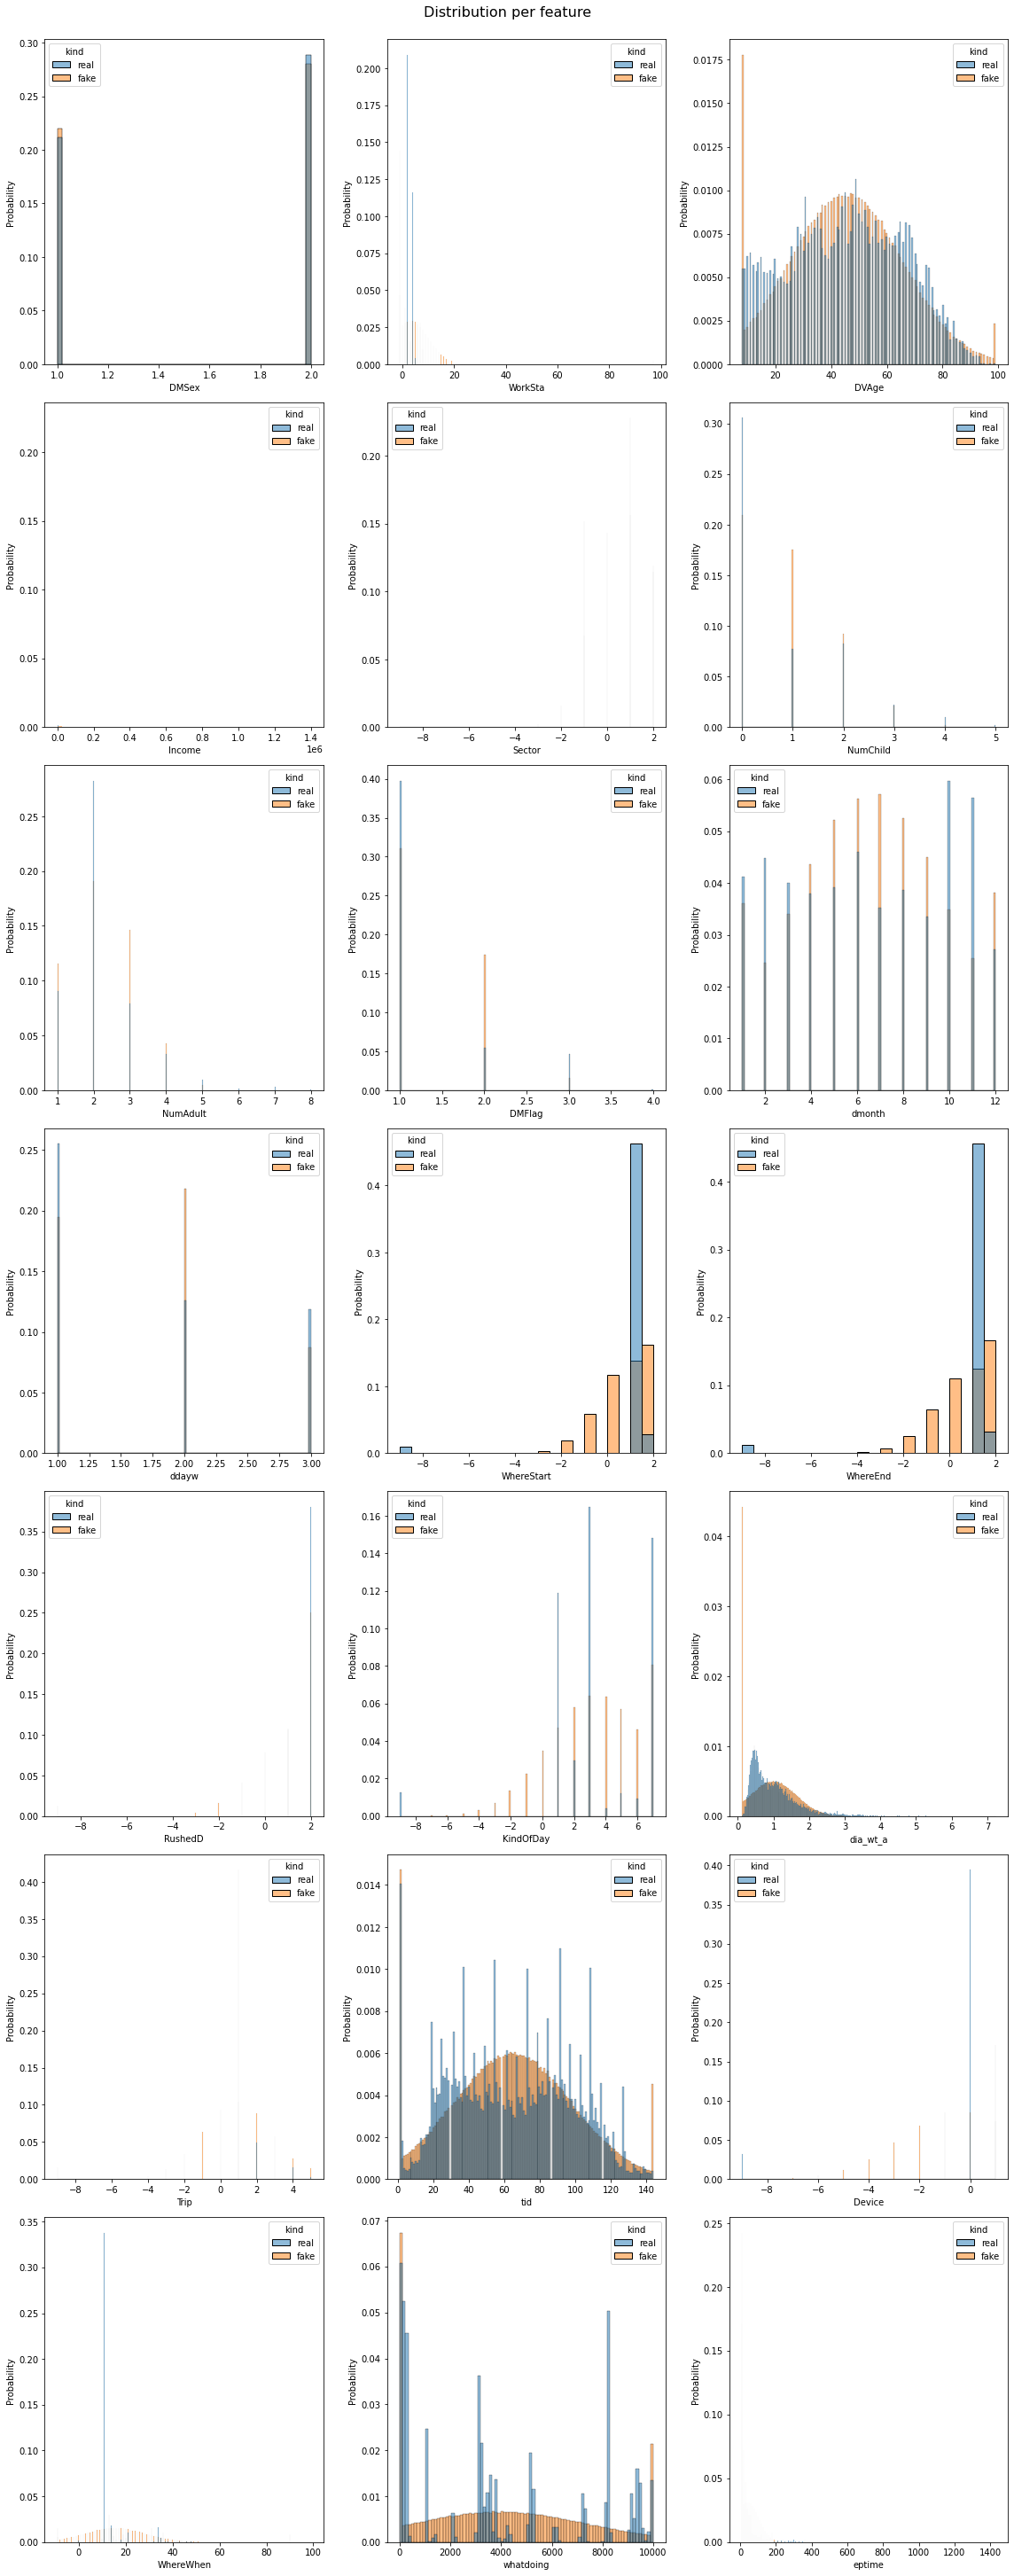

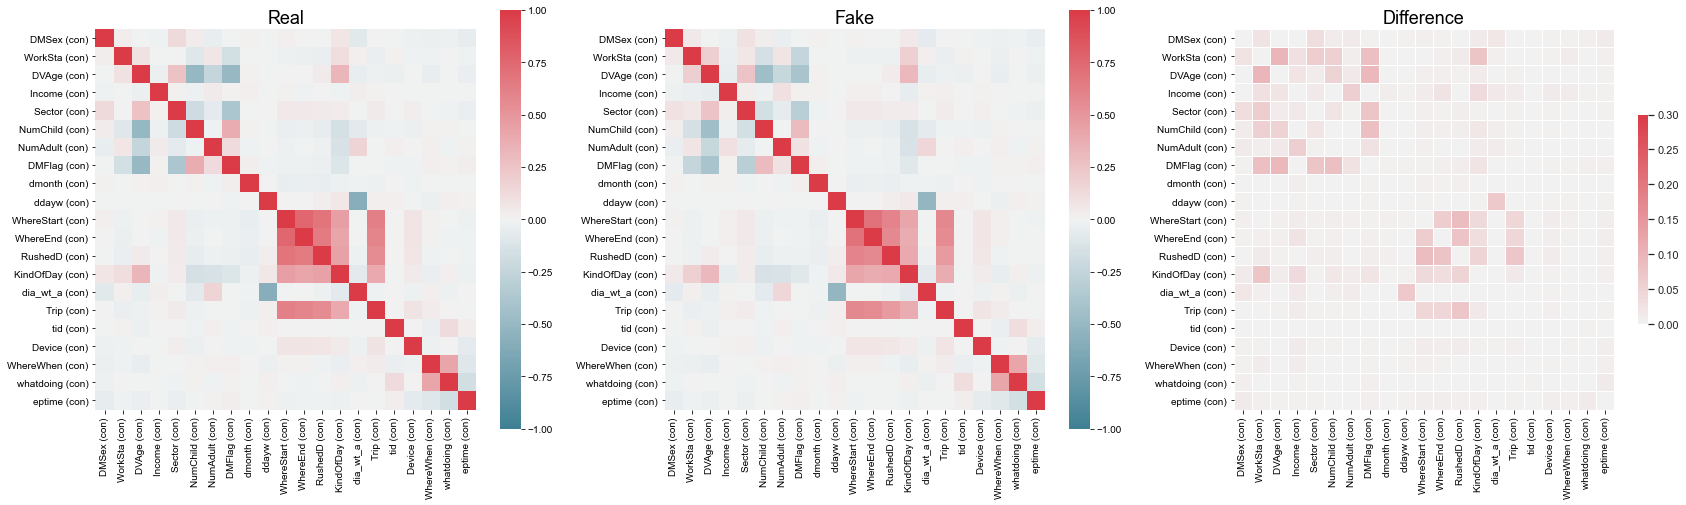

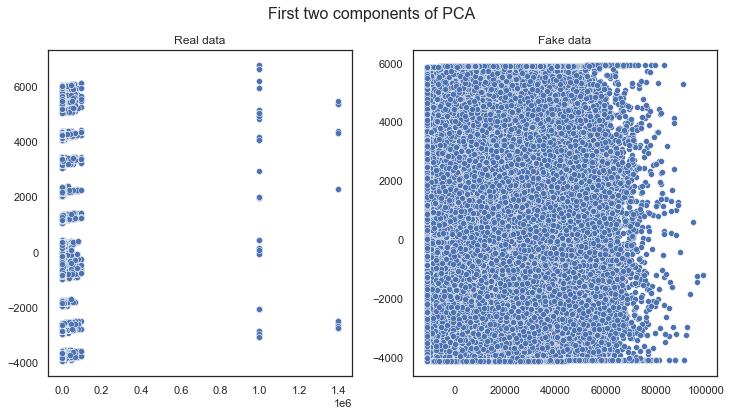

In [5]:
# Evaluating synthetic data...
table_evaluator =  TableEvaluator(real_spss_df, gen_spss)

table_evaluator.visual_evaluation()

In [6]:
_, real_X_test_spss, _, real_y_test_spss = split_data(real_spss_df)
_, real_X_test_ce, _, real_y_test_ce = split_data(real_ce_df)
_, gen_sep_X_test_spss, _, gen_sep_y_test_spss = split_data(gen_spss_sep)
_, gen_X_test_spss, _, gen_y_test_spss = split_data(gen_spss)
_, gen_sep_X_test_ce, _, gen_sep_y_test_ce = split_data(gen_ce_sep)
_, gen_X_test_ce, _, gen_y_test_ce = split_data(gen_ce)

In [39]:
# Making prediction...
def prediction(model, X_test, y_test):
    X_test = normalize(X_test, norm='l2')
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = mse**.5

    print(f'Mean Sq Error: {mse}')
    print(f'Root Mean Sq Error: {rmse}')
    print(f'Mean Abs Error: {mae}')

    return predictions

### Real Data with spss encoding

In [41]:
real_pred_spss = prediction(real_spss, real_X_test_spss, real_y_test_spss)

Mean Sq Error: 2176.068595633424
Root Mean Sq Error: 46.648350406347966
Mean Abs Error: 25.775229877520147


### Synthetic data with spss encoding, data generated separately 

In [43]:
gen_sep_pred_ce = prediction(gen_sep_spss, gen_sep_X_test_spss, gen_sep_y_test_spss)

Mean Sq Error: 2298.5575278514584
Root Mean Sq Error: 47.94327406270308
Mean Abs Error: 39.41267904509284


### Synthetic data with spss encoding, data generated after merging them. 

In [44]:
gen_spss_pred = prediction(gen_spss_model, gen_X_test_spss, gen_y_test_spss)

Mean Sq Error: 2189.053231419877
Root Mean Sq Error: 46.78731913050669
Mean Abs Error: 38.62222290989737
